<ipython-input-1-5c2d5bb27eeb>:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  block_P['attractionPP_num']=number_aP_list #집객시설 수 가 담긴 리스트를 블록들의 좌표가 있는 데이터프레임에 추가
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\frame.py:4125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


Text(27.439381510416666, 0.5, 'y')

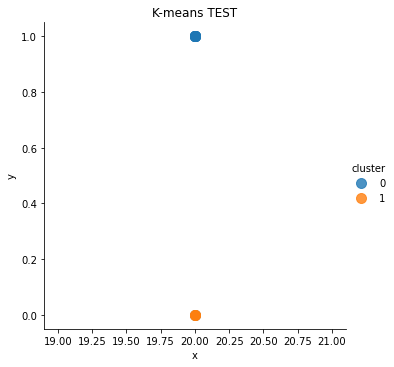

In [1]:
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import math
%matplotlib inline


attractionP = pd.read_csv(r"C:\Users\임유민\Desktop\data/18-9,10(집객시설 정보).csv", delimiter='|') #18테이블 csv파일 가져오기
attractionP[['XCNTS_VALUE_attractionP','YDNTS_VALUE_attractionP']]=attractionP[['XCNTS_VALUE','YDNTS_VALUE']] #x좌표값, y좌표값 칼럼 이름 덮어서 변경
attractionPP=attractionP[['XCNTS_VALUE_attractionP','YDNTS_VALUE_attractionP']] #x,y 좌표 칼럼만 뽑아서 데이터프레임으로 지정
attractionPL=len(attractionPP) #데이터프레임 열의 길이

block = pd.read_csv(r"C:\Users\임유민\Desktop\data/23-9,10(블록중심좌표).csv", delimiter='|') #23테이블 csv파일 가져오기
block[['ADSTRD_CD','XCNTS_VALUE_block','YDNTS_VALUE_block']]=block[['ADSTRD_CD','XCNTS_VALUE','YDNTS_VALUE']]#x좌표값, y좌표값 칼럼 이름 덮어서 변경
block_P=block[['ADSTRD_CD','XCNTS_VALUE_block','YDNTS_VALUE_block']] #행정동,x,y 좌표 칼럼만 뽑아서 데이터프레임으로 지정
block_L=len(block_P) #데이터프레임 열의 길이

#  다음의 반복문은 23테이블 한 열의 x,y좌표로 만든 식을 기준으로 18테이블 집객시설들의 x,y 좌표들를 넣어보면서 일정 거리
#  내에 있는 집객시설의 수를 리스트에 추가, 이 과정을 23테이블 한열씩 함으로써 수집한 테이터를 2차원 리스트로 전환,
#  값들을 데이터프레임으로 변형하여 attractionPP 데이터 브레임에 추가해 블럭마다 일정거리에 있는 집객시설 수를 알 수 있음
number_aP_list=[]
for k in range(block_L):
    attractionPP_list=[]
    block_P_x=block_P.iloc[k,1] #각 블록의 x좌표 값들을 반복문을 통해 순서대로 가져옴
    block_P_y=block_P.iloc[k,2] #각 블록의 y좌표 값들을 반복문을 통해 순서대로 가져옴
    for i in range(attractionPL):
        attractionPP_x=attractionPP.iloc[i,0]#각 집객시설의 x좌표 값들을 반복문을 통해 순서대로 가져옴
        attractionPP_y=attractionPP.iloc[i,1]#각 집객시설의 y좌표 값들을 반복문을 통해 순서대로 가져옴
        number_aP=abs(((block_P-attractionPP_x)**2+(block_P-attractionPP_y)**2)) #블록 근처에 있는 집객시설 수 계산식
        attractionPP_list.append(number_aP) #거리안에 있는 집객시설 데이터 리스트에 추가
    number_aP_dt=len(attractionPP_list) #리스트의 길이를 셈으로 집객시설수 계산, 리스트에 추가
    number_aP_list.append(number_aP_dt) #위의 리스트를 또 다른 리스트에 추가
block_P['attractionPP_num']=number_aP_list #집객시설 수 가 담긴 리스트를 블록들의 좌표가 있는 데이터프레임에 추가

rent_value = pd.read_csv(r"C:\Users\임유민\Desktop\data/9-4(층별 임대시세).csv", delimiter='|') #9테이블 csv파일 가져오기
rent_valueP=rent_value[['ADSTRD_CD','FLOOR_CD','RENT_CD']] #행정동, 층, 임대시세 칼럼만 뽑아서 데이터프레임으로 지정
rent_valueP=rent_valueP[(rent_valueP['FLOOR_CD']<=4)] #층이 4층 이하인 정보들만 추출(4층 이후부터는 층별효용비가 비슷)
rent_valueP = rent_valueP.sort_values(by=['ADSTRD_CD','FLOOR_CD'] ,ascending=True) #행정동과 층을 중심으로 데이터를 내림차순으로 정리


rent_valueP_size=rent_valueP.groupby('ADSTRD_CD').size() #행정동 코드가 같은 열들의 사이즈를 구함(4층 이하의 데이터가 있을 수 있기에 사이즈로 정보를 얻어 계산할 예정)
rent_valueP_size_dt=pd.concat([rent_valueP_size], axis=1) #시리즈로 되어있는 행정동별 사이즈 데이터를 데이터프레임으로 전환
rent_valueP_size_list=list(np.array(rent_valueP_size_dt[0].tolist())) #데이터 프레임->리스트

#행정동별 사이즈 데이터를 9테이블 데이터를 전처리한 데이터 프레임과 합침
rent_value_plus=pd.merge(left=rent_valueP,
             right=rent_valueP_size_dt,
             how='left',
             left_on='ADSTRD_CD',
             right_on='ADSTRD_CD')

floor_ratio=[]
pop=0
for i in rent_valueP_size_list:
    pop=pop+i
    floor_ratio.append(1) #1층의 효용비는 항상 1이기에 1을 리스트에 추가하고 시작
    if i==4: #1,2,3,4 층의 데이터가 있을 때
        _2f_ratio_cal=rent_value_plus.iloc[i-1,2]/rent_value_plus.iloc[pop-(pop-3),2] #2층 효용비 계산
        _3f_ratio_cal=rent_value_plus.iloc[i-1,2]/rent_value_plus.iloc[pop-(pop-2),2] #3층 효용비 계산
        _4f_ratio_cal=rent_value_plus.iloc[i-1,2]/rent_value_plus.iloc[pop-(pop-1),2] #4층 효용비 계산
        floor_ratio.append(_2f_ratio_cal)
        floor_ratio.append(_3f_ratio_cal)
        floor_ratio.append(_4f_ratio_cal)
    elif i==3: #1,2,3 층의 데이터가 있을 때
        _2f_ratio_cal=rent_value_plus.iloc[i-1,2]/rent_value_plus.iloc[pop-(pop-3),2] #2층 효용비 계산
        _3f_ratio_cal=rent_value_plus.iloc[i-1,2]/rent_value_plus.iloc[pop-(pop-2),2] #3층 효용비 계산
        floor_ratio.append(_2f_ratio_cal)
        floor_ratio.append(_3f_ratio_cal)
    elif i==2: #1,2 층의 데이터가 있을 때
        _2f_ratio_cal=rent_value_plus.iloc[i-1,2]/rent_value_plus.iloc[pop-(pop-3),2] #2층 효용비 계산
        floor_ratio.append(_2f_ratio_cal)
    else:
        floor_ratio.append(0) #이외의 값들은 0처리함
        
rent_value_plus['floor_ratio']=floor_ratio #구한 효용비 데이터를 데이터프레임에 추가

rent_value_plus_2f=rent_value_plus[rent_value_plus['FLOOR_CD']==2] #2층인 데이터 분류
rent_value_plus_3f=rent_value_plus[rent_value_plus['FLOOR_CD']==3] #3층인 데이터 분류
rent_value_plus_4f=rent_value_plus[rent_value_plus['FLOOR_CD']==4] #4층인 데이터 분류

rent_value_plus_2fP=rent_value_plus_2f[['ADSTRD_CD','floor_ratio']] #행정동 코드와 2층 효용비 칼럼 뽑아서 데이터프레임 지정
rent_value_plus_2fP.rename(columns={"floor_ratio":"2floor_ratio"}, inplace = True) #칼럼 이름 변경

rent_value_plus_3fP=rent_value_plus_3f[['ADSTRD_CD','floor_ratio']] #행정동 코드와 3층 효용비 칼럼 뽑아서 데이터프레임 지정
rent_value_plus_3fP.rename(columns={"floor_ratio":"3floor_ratio"}, inplace = True) #칼럼 이름 변경

rent_value_plus_4fP=rent_value_plus_4f[['ADSTRD_CD','floor_ratio']] #행정동 코드와 4층 효용비 칼럼 뽑아서 데이터프레임 지정
rent_value_plus_4fP.rename(columns={"floor_ratio":"4floor_ratio"}, inplace = True) #칼럼 이름 변경

#2층 효용비 데이터 행정동 코드 기준 합침
block_PP=pd.merge(left=block_P,
                 right=rent_value_plus_2fP,
                 how= 'left',
                 left_on='ADSTRD_CD',
                 right_on='ADSTRD_CD')

#3층 효용비 데이터 행정동 코드 기준 합침
block_PP=pd.merge(left=block_PP,
                 right=rent_value_plus_3fP,
                 how= 'left',
                 left_on='ADSTRD_CD',
                 right_on='ADSTRD_CD')

#4층 효용비 데이터 행정동 코드 기준 합침
block_PP=pd.merge(left=block_PP,
                 right=rent_value_plus_4fP,
                 how= 'left',
                 left_on='ADSTRD_CD',
                 right_on='ADSTRD_CD')

block_PP = block_PP.fillna(0)#nan 데이터 0값으로 전환
block_PP[(block_PP['2floor_ratio']!=0) & (block_PP['3floor_ratio']!=0) & (block_PP['4floor_ratio']!=0)] #2,3,4층효용비 데이터가 0인 열 제거

#kmeans 라이브러리를 이용하여 k평균군집화 실행(2층 기준)
points=block_PP.values
kmeans = KMeans(n_clusters=2).fit(points) #클러스터 수 조절
kmeans.cluster_centers_
block_PP['cluster']=kmeans.labels_

sb.lmplot('attractionPP_num', '2floor_ratio', data=block_PP, fit_reg=False, scatter_kws={"s":100}, hue="cluster")
plt.title("K-means TEST")
plt.xlabel('x')
plt.ylabel('y')
